In [1]:
# Copyright (c) 2020, Pietro Vischia pietro.vischia@cern.ch

import random
from matplotlib import pyplot as plt


In [2]:
# Simulate the roll of a die

def die_roll():
    roll = random.randint(1,6) 
    return roll

# Check if a given roll is even or odd

def is_even(roll):
    if (roll % 2) == 0:
        return True
    else:
        return False


[1, 5, 10, 20, 30, 40, 50, 60, 80, 90, 100, 130, 160, 180, 200, 400, 500, 750, 1000, 2000, 3000, 5000, 10000, 50000, 100000]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


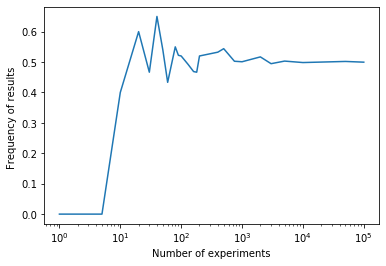

In [5]:
# Define number of experiments

N = [1, 5, 10, 20, 30, 40, 50, 60, 80, 90, 100, 130, 160, 180, 200, 400, 500, 750, 1000, 2000, 3000, 5000, 10000, 50000, 100000]

freqs = [ 0 for n in N ]

print(N)
print(freqs)

for n in range(len(N)):
    # For each set of experiments, throw the die n times
    n_even=0
    for n_i in range(N[n]):
        if is_even(die_roll()):
            n_even +=1
    freqs[n] = n_even/N[n]

# Plot the results
plt.plot(N,freqs)
plt.xlabel('Number of experiments')
plt.xscale('log')
plt.ylabel('Frequency of results ')

plt.show()
